# Mouse Cell Atlas

In [31]:
import scanpy as sc
import numpy as np
import pandas as pd
import re

In [45]:
raw_data_dir = "/home/icb/subarna.palit/projects/data/MCA DGE Data/merged/"
data_dir = "/storage/groups/ml01/workspace/group.daniela/MCA/"

In [33]:
adata = sc.read(raw_data_dir+"MCA_DGE_all_merged.h5", cache=True)

In [34]:
adata

AnnData object with n_obs × n_vars = 233445 × 34749 
    obs: 'batch'

In [35]:
split_idx = [re.split('_|\.|-', idx) for idx in adata.obs.index]
len(split_idx)

233445

In [36]:
adata.obs["tissue"] = [x[0] for x in split_idx]
adata.obs["barcode"] = [x[2] for x in split_idx]

In [37]:
adata.obs.index = range(0, adata.n_obs)

In [38]:
adata.obs.head()

batch      tissue             barcode
0     0  BoneMarrow  AAGCGGAGGACTGTGGTA
1     0  BoneMarrow  CCGACGGGTACATAGTCG
2     0  BoneMarrow  AGGACTATCTCTACCTGA
3     0  BoneMarrow  TATGTAACTTATTCACTT
4     0  BoneMarrow  AAGCGGATCTCTTGCAAT

## Cell and Tissue Annotation

In [39]:
annotation = pd.read_csv(raw_data_dir+"MCA_labels_all_merged.csv", index_col=0)

In [40]:
annotation.shape

(233445, 1)

In [41]:
annotation.head()

0
0      Monocyte_Mif high(Bone-Marrow)
1  Neutrophil_Cebpe high(Bone-Marrow)
2  Neutrophil_Cebpe high(Bone-Marrow)
3   Neutrophil_Fcnb high(Bone-Marrow)
4    Neutrophil_Ngp high(Bone-Marrow)

In [42]:
annotation.index = range(0, annotation.shape[0])

In [43]:
split_anno = annotation["0"].str.split("(", expand=True)
ct_split = split_anno[0].str.split("_", expand=True)

adata.obs["cell_type"] = ct_split[0].tolist()
adata.obs["marker_gene"] = ct_split[1].tolist()
#adata.obs["tissue"] = split_anno[1].str.replace(")", "").tolist()

In [61]:
adata.obs.head()

batch      tissue             barcode   cell_type marker_gene  n_counts  \
0     0  BoneMarrow  AAGCGGAGGACTGTGGTA    Monocyte    Mif high    6764.0   
1     0  BoneMarrow  CCGACGGGTACATAGTCG  Neutrophil  Cebpe high    6999.0   
2     0  BoneMarrow  AGGACTATCTCTACCTGA  Neutrophil  Cebpe high    4611.0   
3     0  BoneMarrow  TATGTAACTTATTCACTT  Neutrophil   Fcnb high    3903.0   
4     0  BoneMarrow  AAGCGGATCTCTTGCAAT  Neutrophil    Ngp high    3713.0   

   log_counts  n_genes  percent_mito  
0    8.819369     2291      0.004140  
1    8.853522     2300      0.007573  
2    8.436200     1652      0.005422  
3    8.269501     1415      0.004356  
4    8.219596     1300      0.008618

In [46]:
adata.write(data_dir+"adata_raw_annotated.h5ad")

... storing 'tissue' as categorical
... storing 'barcode' as categorical
... storing 'cell_type' as categorical
... storing 'marker_gene' as categorical


## QC

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import scIB

In [48]:
plt.rcParams['figure.figsize'] = 8,8

In [56]:
sum(adata.var.index.str.startswith("mt"))

35

In [57]:
scIB.preprocessing.summarize_counts(adata, mt_gene_regex='^mt-')

Transforming to str index.


BoneMarrow


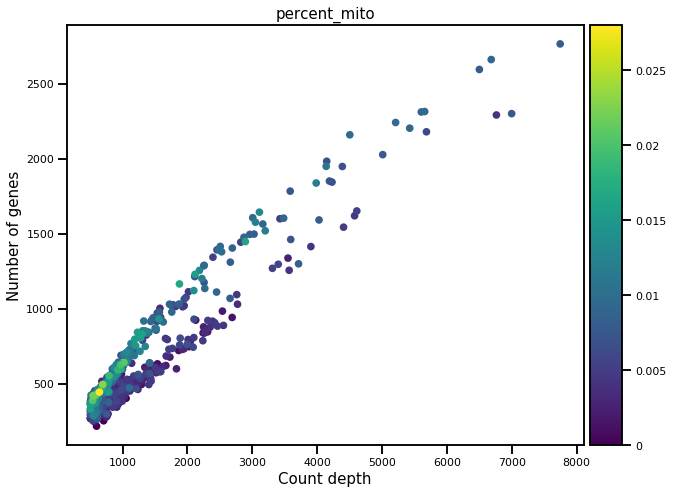

Transforming to str index.


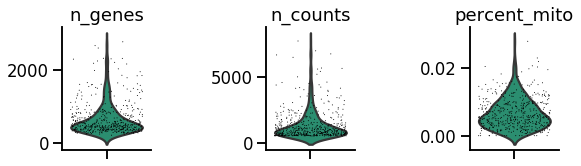

Transforming to str index.


Bladder


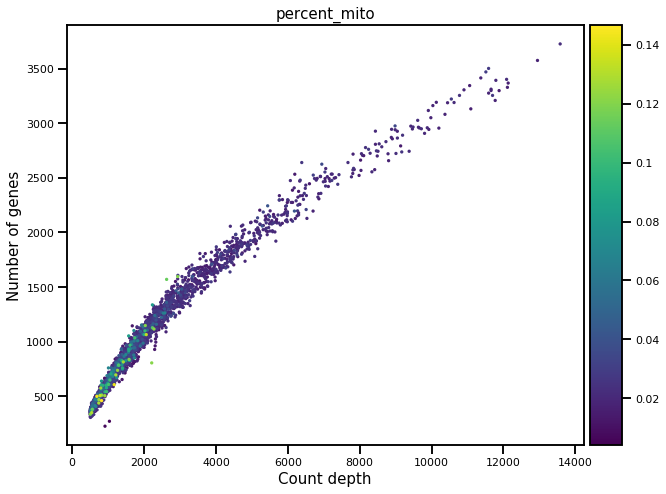

Transforming to str index.


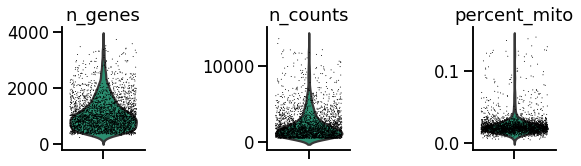

Transforming to str index.


FetalIntestine


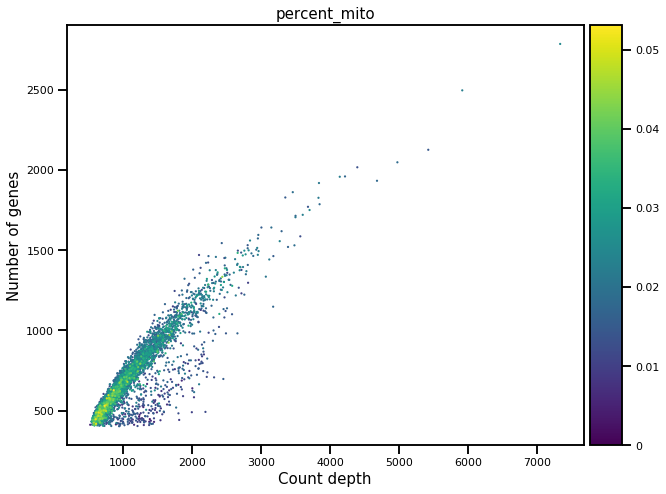

Transforming to str index.


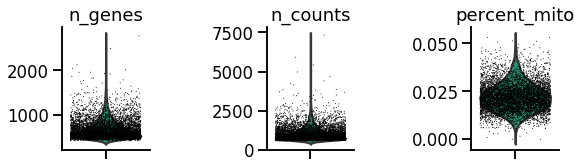

Transforming to str index.


FetalBrain


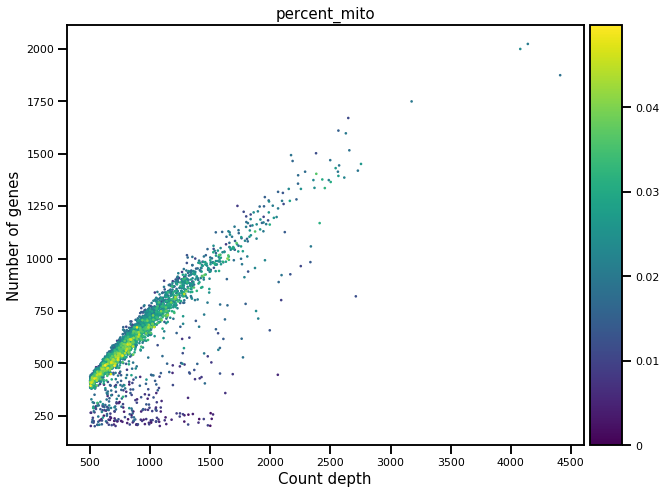

Transforming to str index.


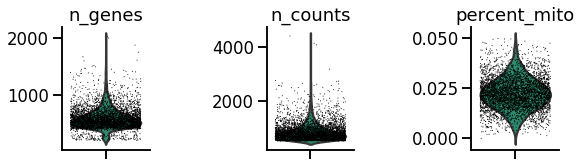

Transforming to str index.


FetalFemaleGonad


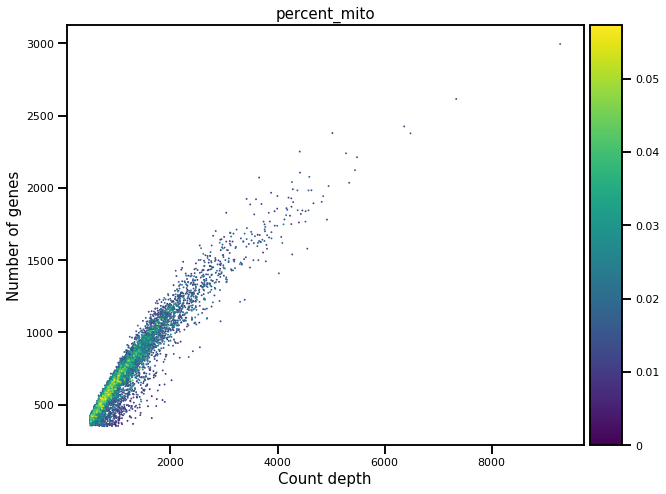

Transforming to str index.


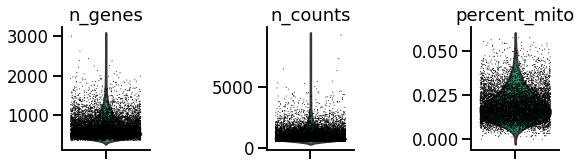

EmbryonicStemCells


Transforming to str index.


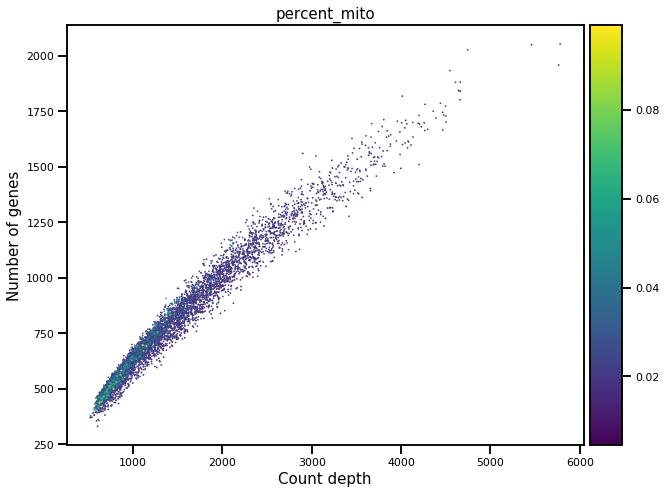

Transforming to str index.


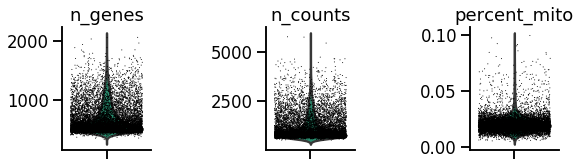

Transforming to str index.


EmbryonicMesenchyme


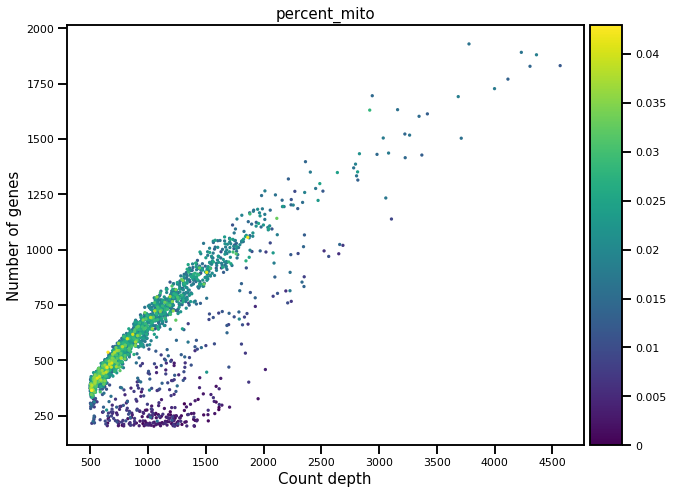

Transforming to str index.


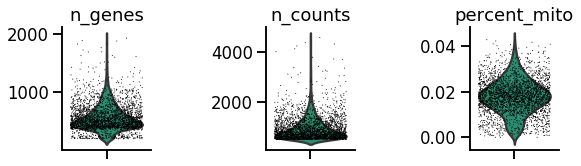

Transforming to str index.


Brain


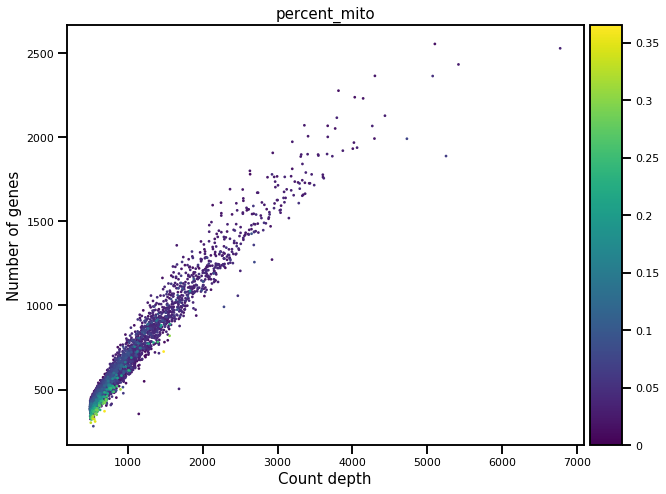

Transforming to str index.


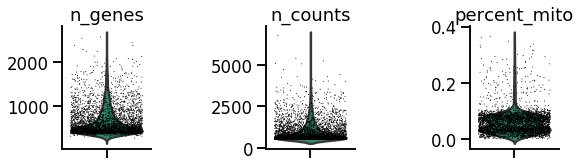

BoneMarrowcKit


Transforming to str index.


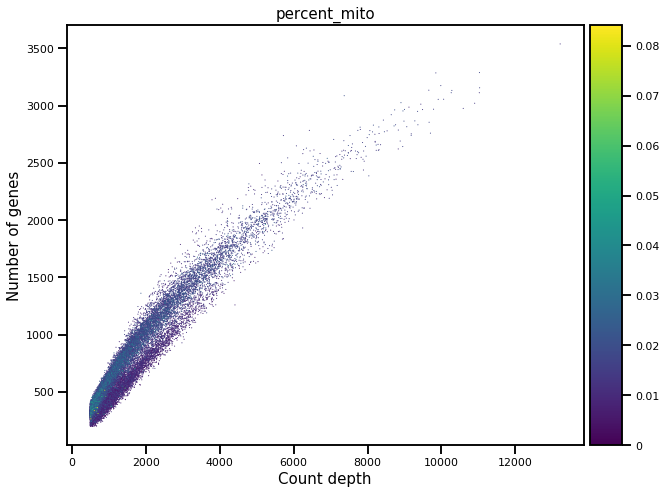

Transforming to str index.


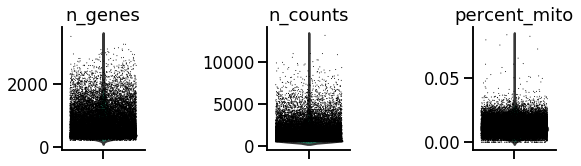

MammaryGland


Transforming to str index.


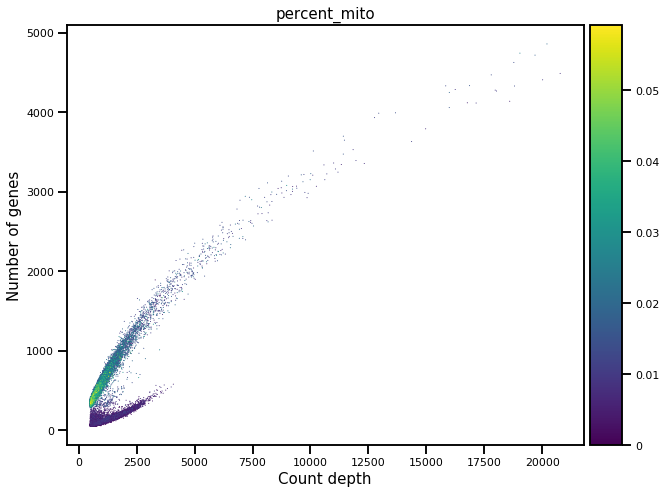

Transforming to str index.


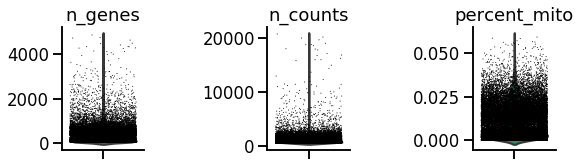

Transforming to str index.


Male(fetal)Gonad


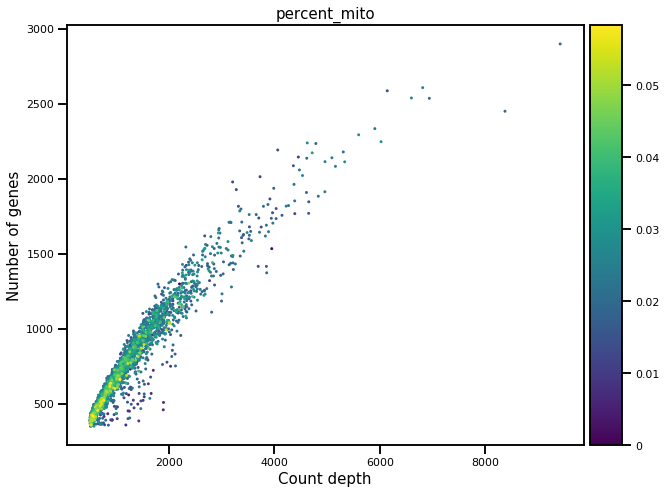

Transforming to str index.


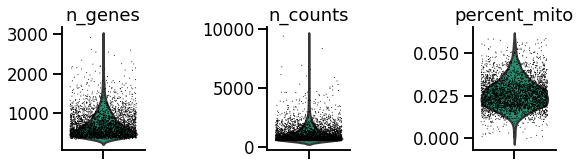

Transforming to str index.


Lung


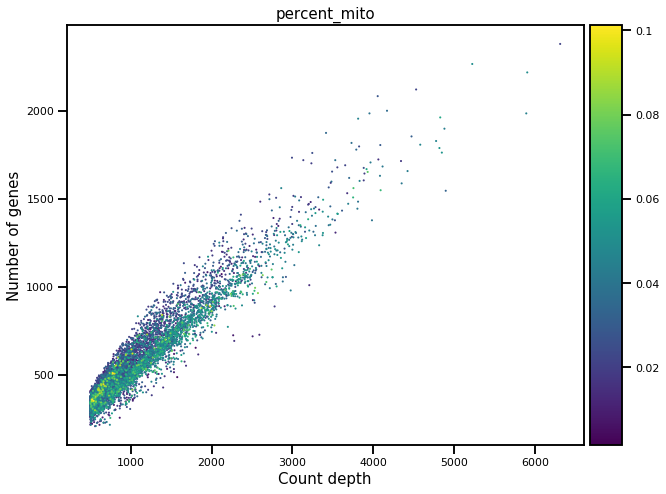

Transforming to str index.


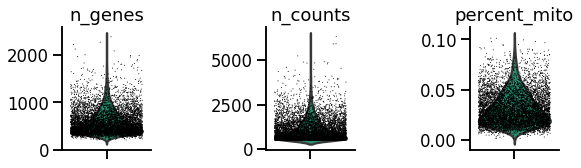

Transforming to str index.


Liver


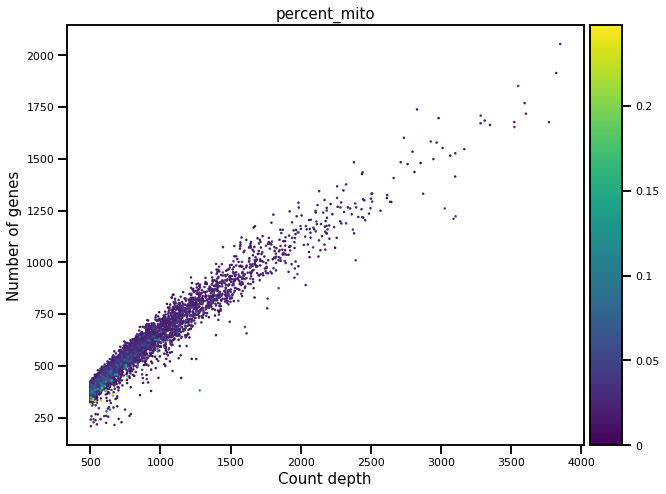

Transforming to str index.


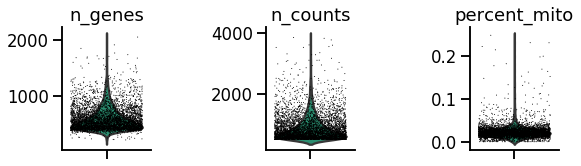

Kidney


Transforming to str index.


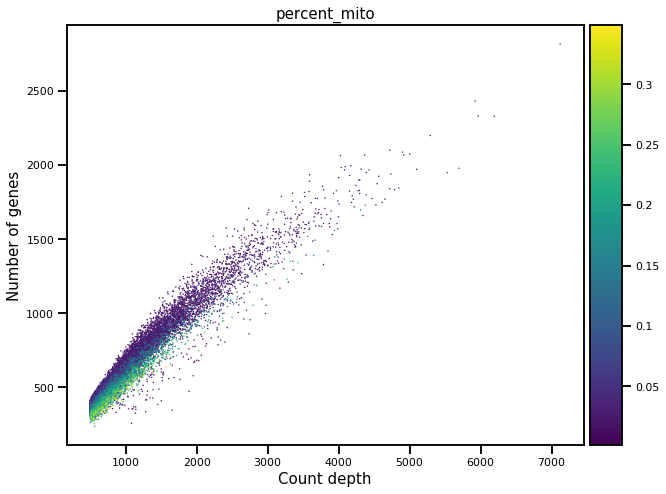

Transforming to str index.


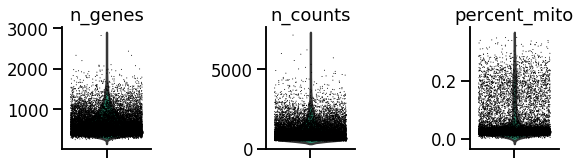

Transforming to str index.


FetalStomach


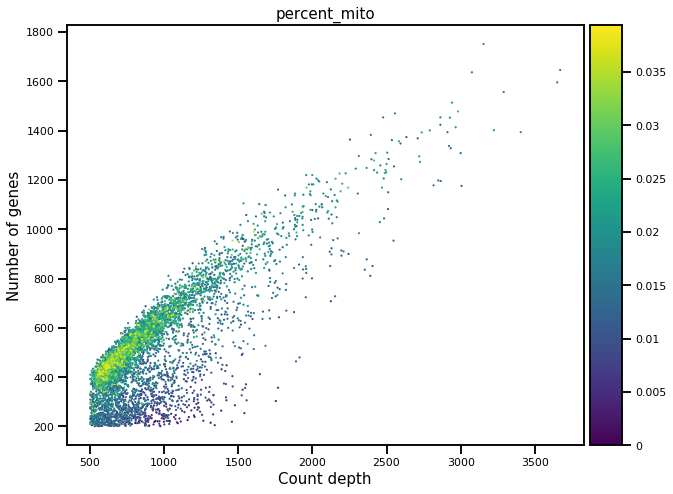

Transforming to str index.


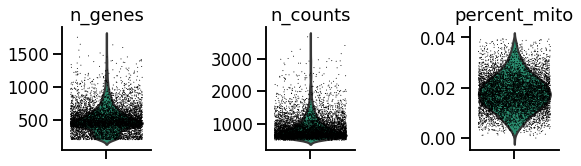

Transforming to str index.


FetalLung


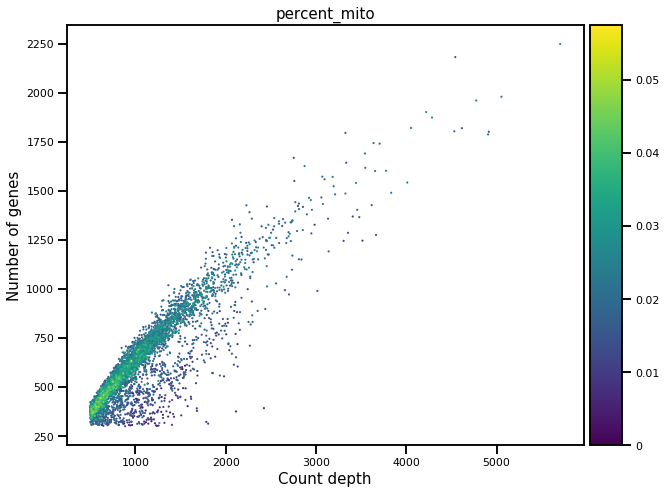

Transforming to str index.


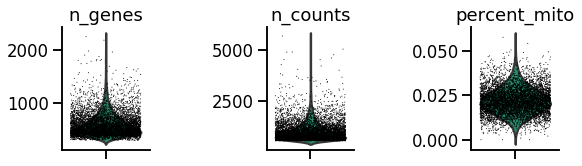

Transforming to str index.


FetalLiver


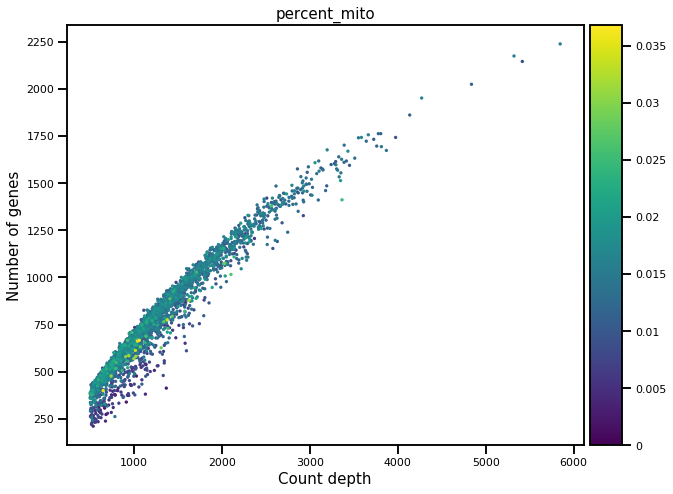

Transforming to str index.


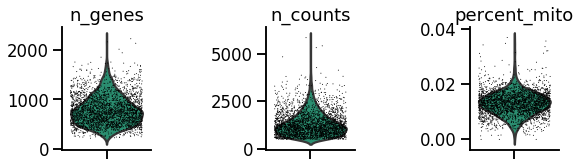

Transforming to str index.


NeonatalHeart


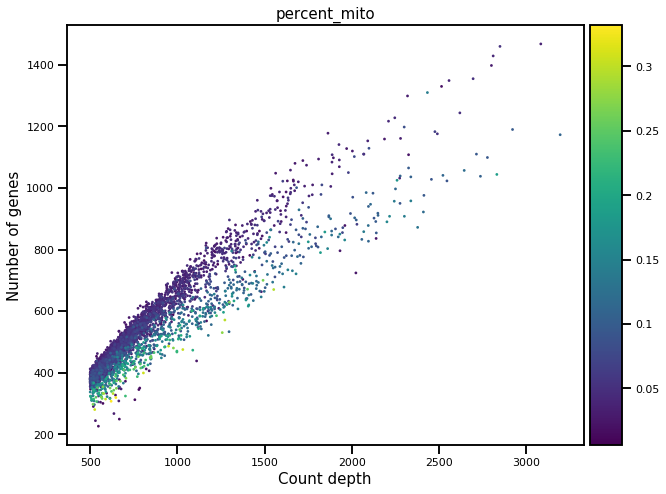

Transforming to str index.


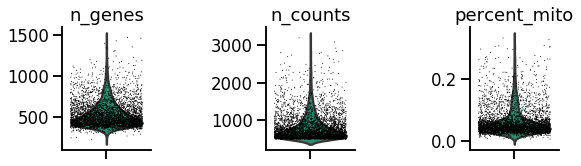

Transforming to str index.


NeonatalCalvaria


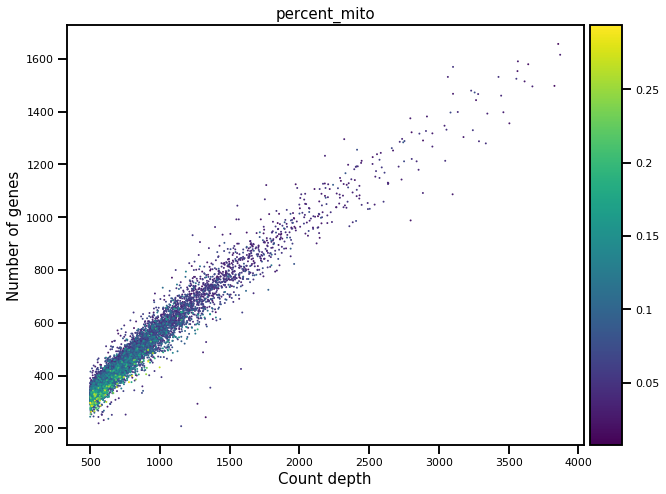

Transforming to str index.


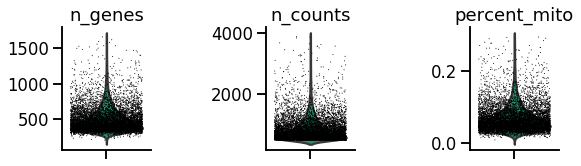

Transforming to str index.


NeonatalBrain


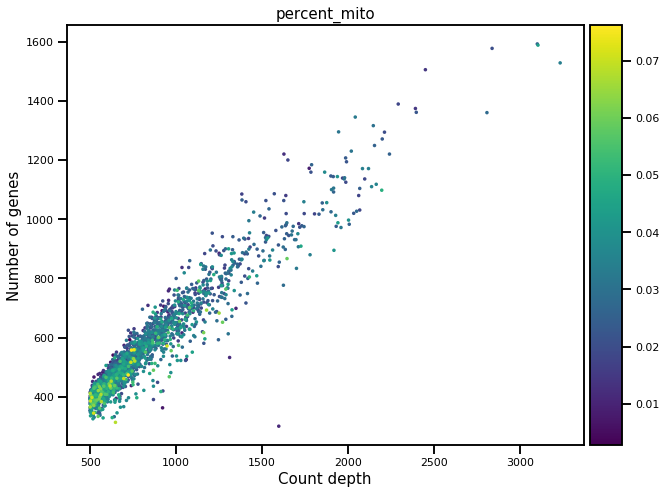

Transforming to str index.


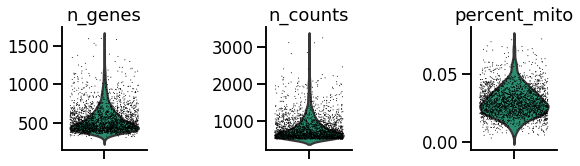

Transforming to str index.


Muscle


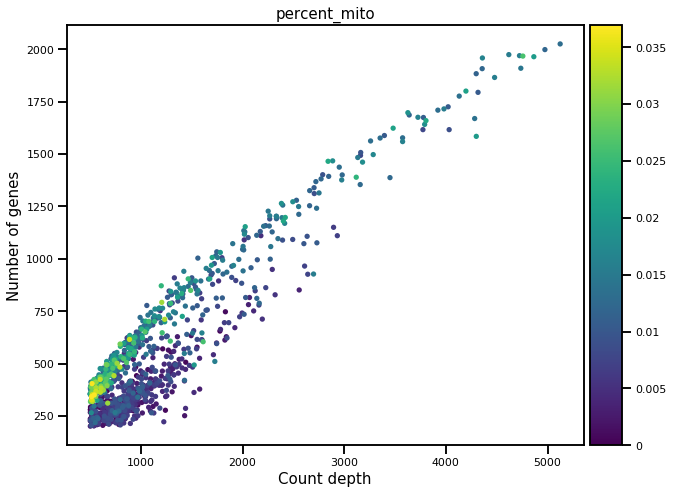

Transforming to str index.


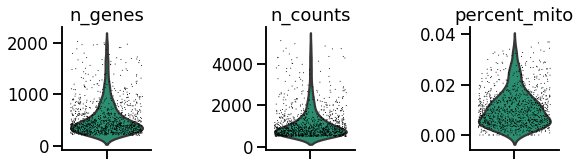

Transforming to str index.


Pancreas


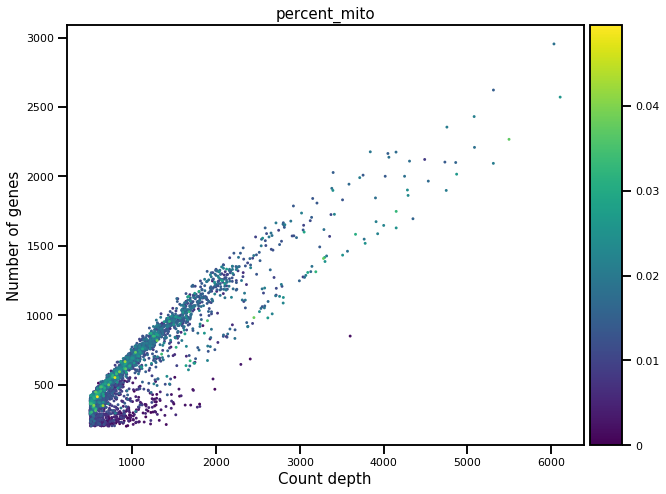

Transforming to str index.


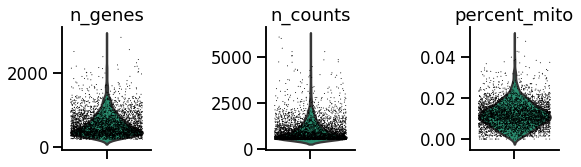

Transforming to str index.


Ovary


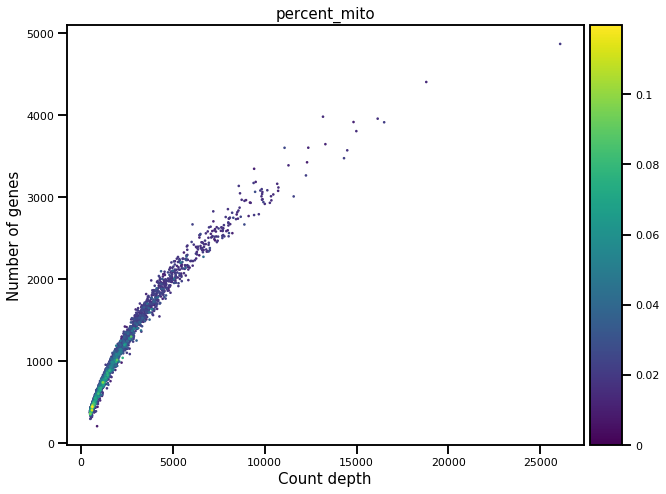

Transforming to str index.


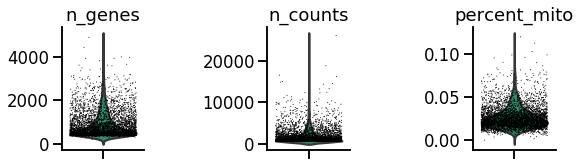

Transforming to str index.


NeonatalSkin


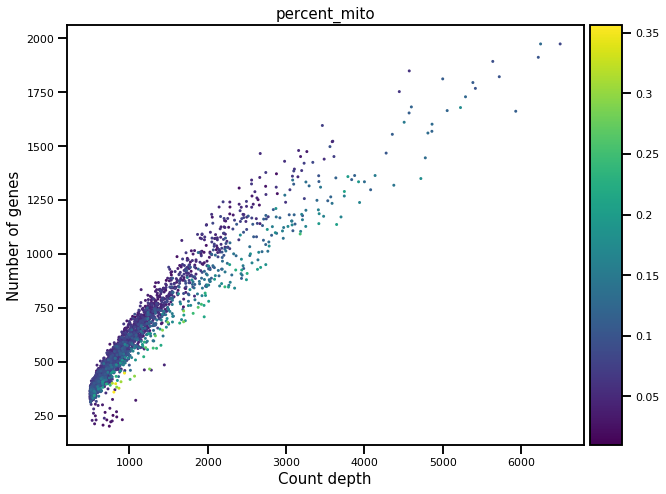

Transforming to str index.


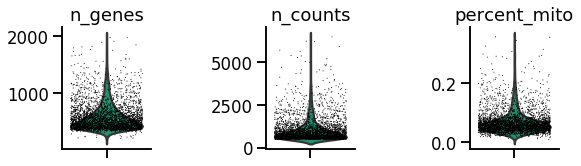

Transforming to str index.


NeonatalRib


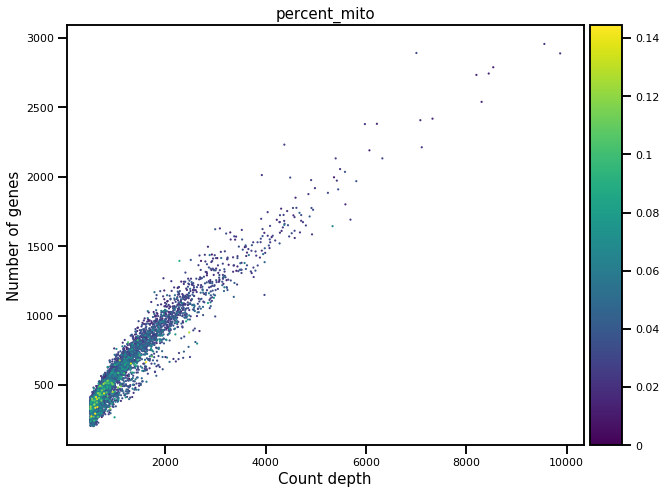

Transforming to str index.


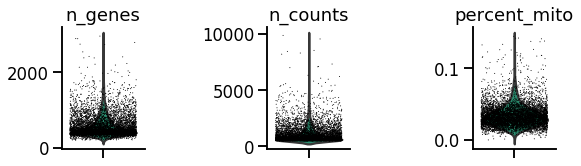

Transforming to str index.


NeonatalPancreas


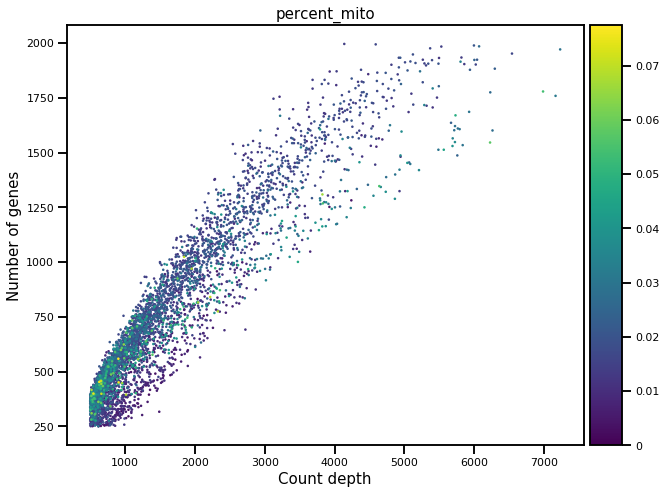

Transforming to str index.


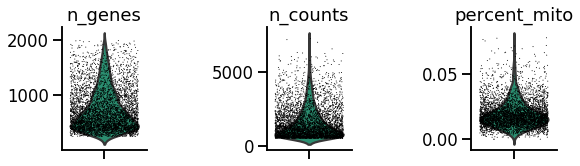

Transforming to str index.


NeonatalMuscle


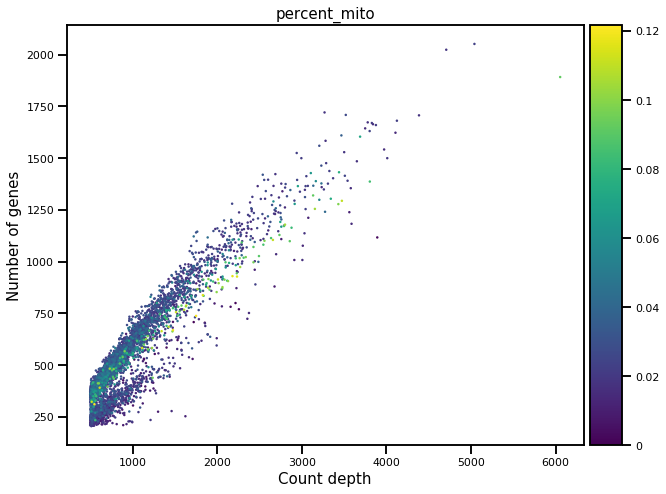

Transforming to str index.


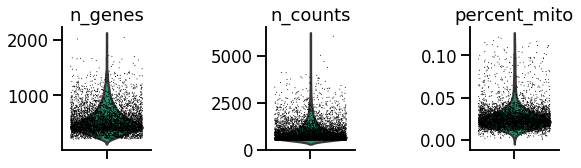

Transforming to str index.


Stomach


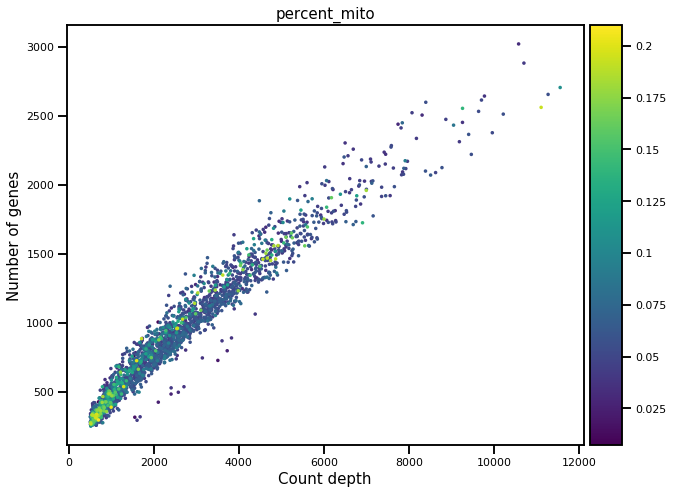

Transforming to str index.


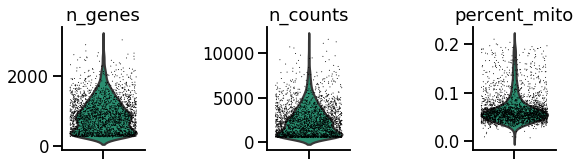

Transforming to str index.


Spleen


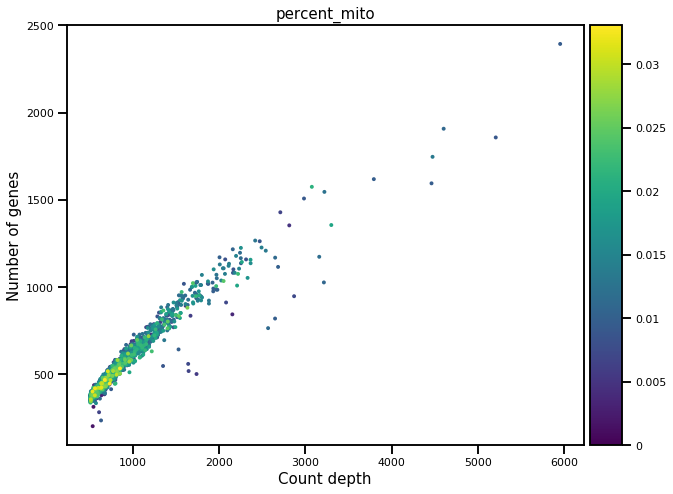

Transforming to str index.


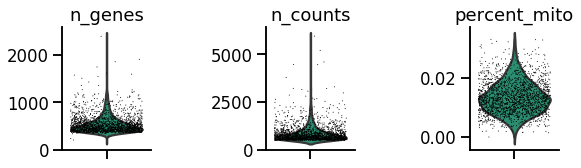

Transforming to str index.


SmallIntestine


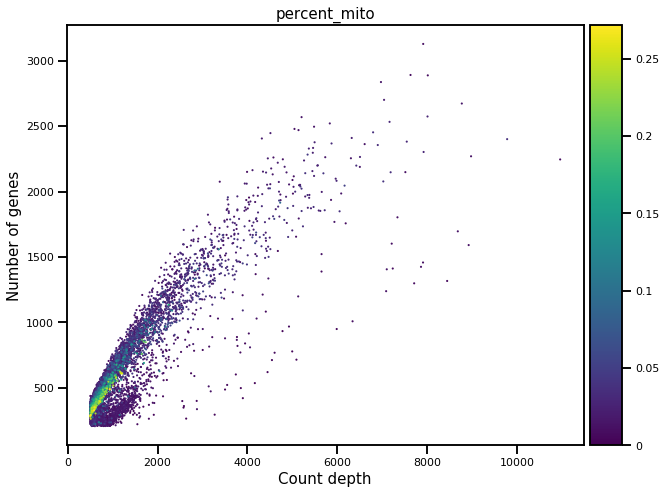

Transforming to str index.


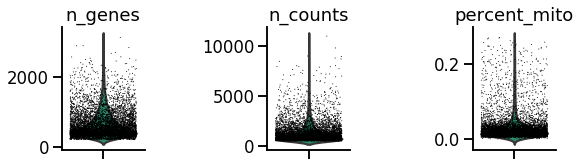

Transforming to str index.


Prostate


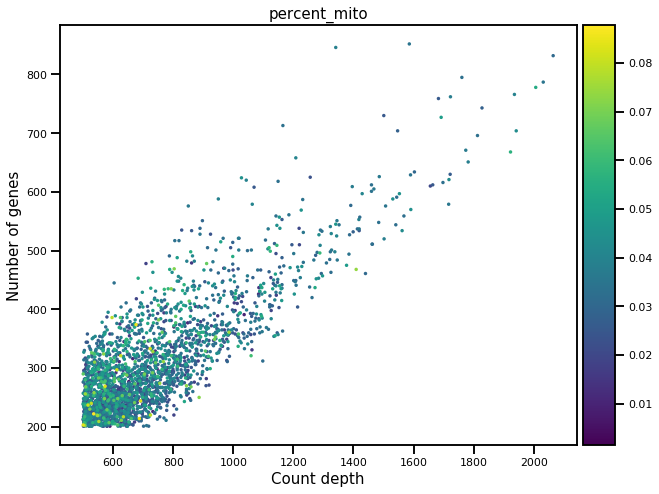

Transforming to str index.


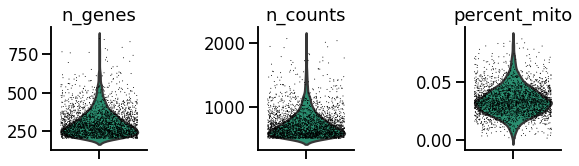

Transforming to str index.


Placenta


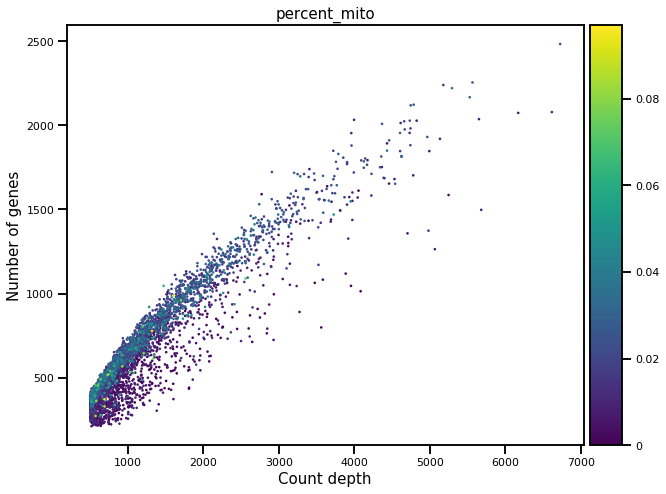

Transforming to str index.


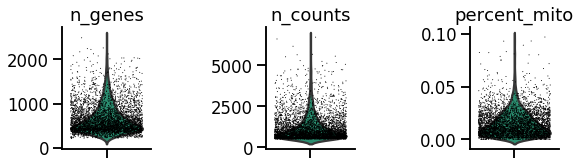

Transforming to str index.


PeripheralBlood


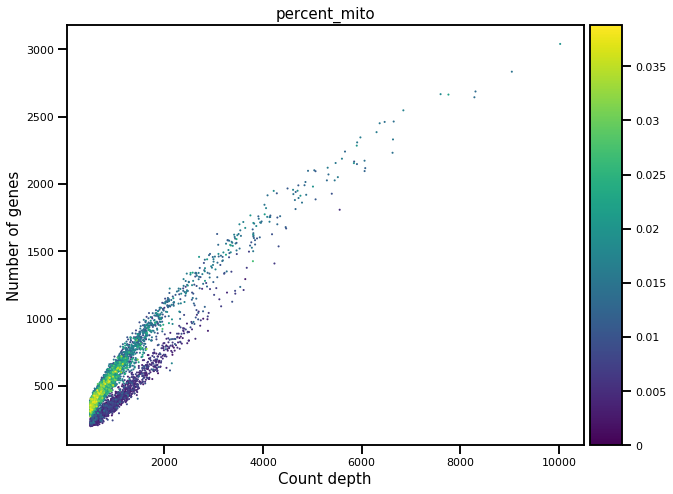

Transforming to str index.


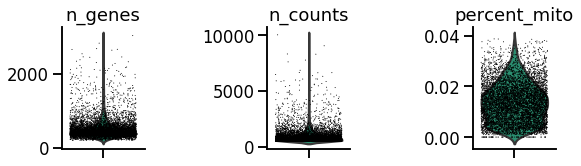

Transforming to str index.


Uterus


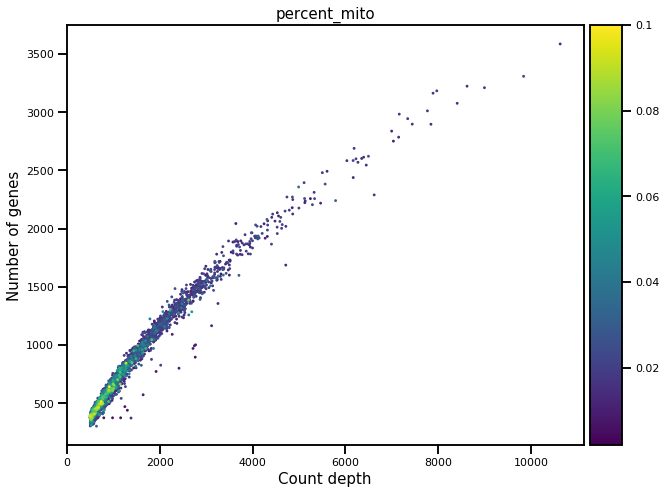

Transforming to str index.


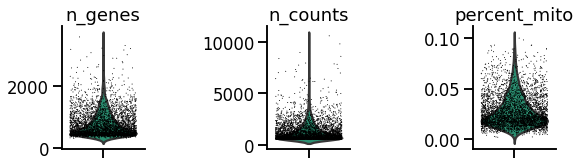

TrophoblastStemCells


Transforming to str index.


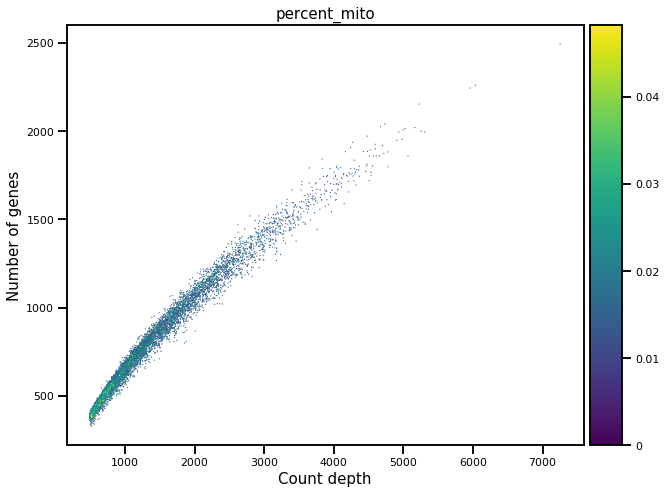

Transforming to str index.


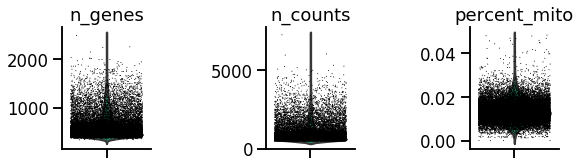

Transforming to str index.


Thymus


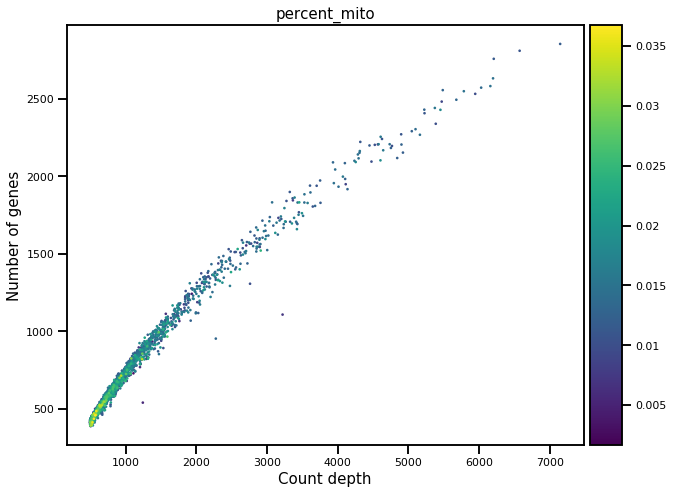

Transforming to str index.


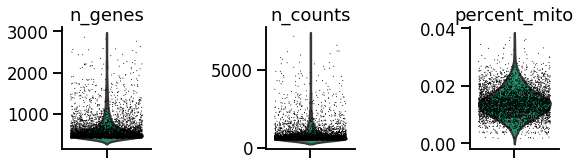

In [75]:
for tissue in adata.obs['tissue'].unique():
    print(tissue)
    scIB.preprocessing.plot_QC(adata[adata.obs["tissue"] == tissue], color='percent_mito')
    sc.pl.violin(adata[adata.obs["tissue"] == tissue], keys=['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)

## Normalisation

In [76]:
for tissue in adata.obs['tissue'].unique():
    print(tissue)
    scIB.preprocessing.normalize(adata)

BoneMarrow


RRuntimeError: Error in library("scran") : there is no package called ‘scran’
Calls: <Anonymous> -> <Anonymous> -> library
